In [28]:
def f(x):
  return 8.5 - 20*x +12*x**2 - 2*x**3


In [29]:
import matplotlib.pyplot as plt
import numpy as np


In [30]:
def euler(x, y, h, f):
  return y + f(x)*h

In [31]:
def predictor_corrector(x, y, h, f):
  y1 = euler(x,y,h, f)
  return y + (f(x) + f(x+h))/2*h


In [32]:
def runge_kutta(x, y, h, f):
  k1 = f(x)
  k2 = f(x + h/2)
  k3 = f(x + h/2)
  k4 = f(x + h)

  return  y + (k1 + 2*k2 + 2*k3 + k4)/6*h

In [33]:

x, y = 0, 1
y_arr = [y]
x_arr = [x]
for i in range(1,9):
  y1 = euler(x, y, 0.5, f)
  x = x + 0.5
  y = y1
  y_arr.append(y)
  x_arr.append(x)

x, y = 0, 1
y_pc = [y]
for i in range(1,9):
  y1 = predictor_corrector(x, y, 0.5, f)
  x = x + 0.5
  y = y1
  y_pc.append(y)




In [34]:
x, y = 0, 1
y_rk = [y]
for i in range(1,9):
  y1 = runge_kutta(x, y, 0.5, f)
  x = x + 0.5
  y = y1
  y_rk.append(y)



In [35]:
def int_f(x):
    return (-0.5 * (x**4)) + 4 * (x**3) - 10 * (x**2) + 8.5 * x + 1


y_true = [int_f(x) for x in x_arr]

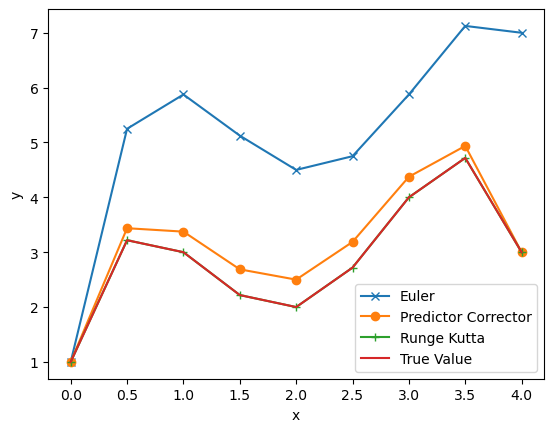

In [36]:
plt.plot(x_arr, y_arr, marker='x', label = 'Euler')
plt.plot(x_arr, y_pc, marker='o', label = 'Predictor Corrector')
plt.plot(x_arr, y_rk, marker='+', label = 'Runge Kutta')
plt.plot(x_arr, y_true, label = 'True Value')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()


# Question 2

In [37]:
def f2(x, v, c):
    return -(c/20)*v - x


In [47]:

def predictor_corrector2(c, f):
  v=[0]
  x=[1]
  dt = 0.1
  steps = int(15 / dt)
  t = np.arange(0, 15.1, 0.1)

  for i in range(0, steps):

    x_next = x[i] + v[i]*dt
    acc = f(x[i], v[i], c)
    v_next = v[i] + acc*dt

    v_next = v[i] + (f(x_next, v[i], c) + f(x_next, v_next, c))/2*dt
    x_next = x[i] + v_next*dt

    v.append(v_next)
    x.append(x_next)

  return (x, v, t)

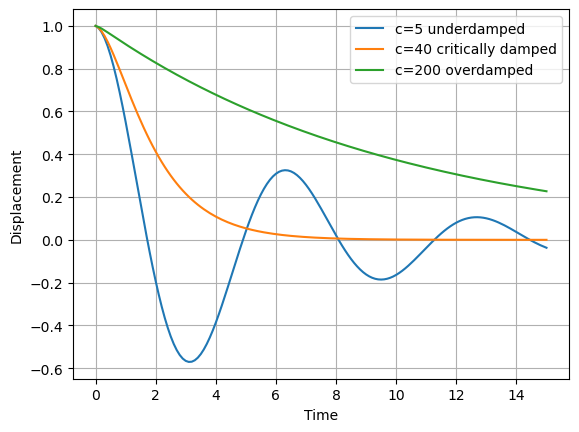

In [52]:
x1, v, t = predictor_corrector2(5, f2)
x2, v, t = predictor_corrector2(40, f2)
x3, v, t = predictor_corrector2(200, f2)

plt.plot(t, x1, label='c=5 underdamped')
plt.plot(t, x2, label='c=40 critically damped')
plt.plot(t, x3, label='c=200 overdamped')
plt.xlabel('Time')
plt.ylabel('Displacement')
plt.legend()
plt.grid('True')
plt.show()
